# <h1 align='center'><font color="red">Time Series with Python</font></h1> 

<font color="pink">Senior Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Time Series with Python](https://www.datacamp.com/tutorial/time-series-analysis-tutorial)

* [Time Series Forecasting Tutorial](https://www.datacamp.com/tutorial/tutorial-time-series-forecasting)

* [Google Trends](https://trends.google.com/trends/explore?geo=BR&q=diet,gym,finance,OpenAI)


# <font color="pink">Contextualizando</font>

Verificamos os dados do Google Trends das palavras-chave "dieta" (`diet`), "academia" (`gym`) e "finanças" (`finance`) para ver como elas variam ao longo do tempo (`aprenderemos sobre tendências e sazonalidade em dados de séries temporais`). Nós nos perguntamos se poderia haver mais pesquisas para esses termos em janeiro?

Este tutorial é inspirado no [datacamp]() e no [FiveThirtyEight](https://fivethirtyeight.com/features/how-fast-youll-abandon-your-new-years-resolutions/).

# <font color="gree">Importing Packages and Data</font>

Você pode baixar o dataset [aqui](https://github.com/datacamp/datacamp_facebook_live_ny_resolution).

In [1]:
# Import packages
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # A seguir usamos '%matplotlib inline' para plotar as Imagens no Jupyter Notebook
%matplotlib inline 

import seaborn as sns
sns.set() # Para os padrões do Seaborn 


df = pd.read_csv('data/multiTimeline.csv', skiprows=1) # 'skiprows' argumento para pular a primeira linha no início do arquivo.
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 168 non-null    object
 1   diet: (Worldwide)     168 non-null    int64 
 2   gym: (Worldwide)      168 non-null    int64 
 3   finance: (Worldwide)  168 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 5.4+ KB


<font color="orange">Agora que você importou seus dados do `Google Trends` e deu uma olhada rápida neles, é hora de organizar seus dados e colocá-los no formato desejado para prepará-los para análise de dados.</font>

In [3]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()


,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


<font color="orange">Em seguida, você transformará a coluna `'month'` em um tipo de dados `DateTime` e a tornará o índice do DataFrame.



`Note` que você faz isso porque viu no resultado do método `.info()` que a coluna `'Month'` era, na verdade, um tipo de dado of `object`. Agora, esse tipo de dado genérico encapsula tudo, de strings a inteiros, etc. Não é exatamente isso que você quer quando quer olhar para dados de `séries temporais`. É por isso que você usará `.to_datetime()` para converter a coluna `'month'` em seu DataFrame para um `DateTime`.

Tenha cuidado! Certifique-se de incluir o argumento `inplace` quando estiver definindo o índice do DataFrame df para que você realmente altere o índice original e o defina para a coluna 'month'.

</font>

In [4]:
df.month = pd.to_datetime(df.month)

df.set_index('month', inplace=True) # O método .set_index() do Pandas é utilizado para definir um ou mais índices em um DataFrame.


In [5]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


# <font color="gree">A bit of Exploratory Data Analysis (EDA)</font>

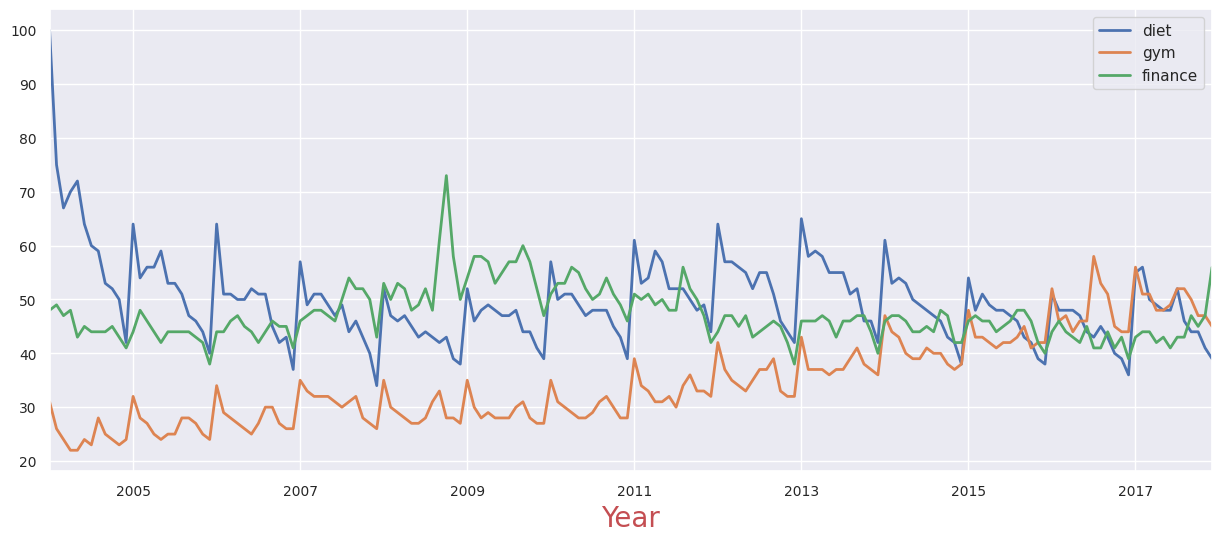

In [6]:
df.plot(figsize=(15, 6), linewidth=2, fontsize=10)

plt.xlabel('Year', c="r", fontsize=20)
plt.grid(True)
plt.show()



Note que esses dados são relativos. Como você pode ler no `Google trends`:

Os números representam o interesse de pesquisa em relação ao ponto mais alto no gráfico para a região e o tempo fornecidos. Um valor de `100` é o pico de popularidade do termo. Um valor de `50` significa que o termo tem metade da popularidade. Da mesma forma, uma pontuação de `0` significa que o termo teve menos de `1%` da popularidade do pico.


<font color="gree">Se desejar, você também pode plotar a coluna `'diet'` sozinha como uma série temporal:</font>

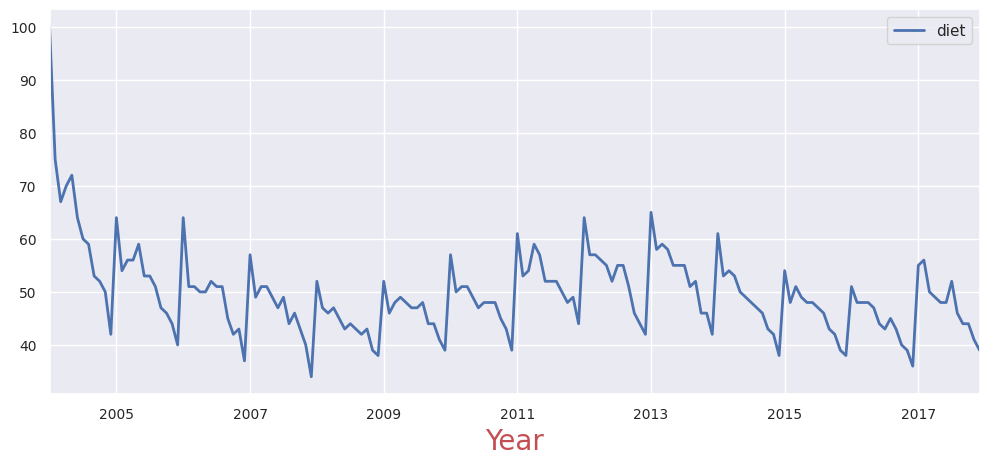

In [7]:
df[['diet']].plot(figsize=(12, 5), linewidth=2, fontsize=10)
plt.xlabel('Year', c="r", fontsize=20)
plt.show()


<font color="pink">Usamos `plotly` para poder visualizar a Série Temporal de maneira mais interactiva:</font>

In [12]:
import plotly.express as px

# Preparando os dados:
df.index = pd.to_datetime(df.index)
# Criando o gráfico:
fig = px.line(df, x=df.index, y='diet')
# Adicionando interatividade:
fig.update_xaxes(rangeslider_visible=True)
fig.show()

<font color="orange">`Nota:`

A primeira coisa a notar é que há `sazonalidade`: todo mês de `janeiro`, há um grande salto. Além disso, parece haver uma `tendência`: parece subir um pouco, depois descer, subir de novo e depois descer de novo. Em outras palavras, parece que há `tendências` e `componentes sazonais` nessas série temporal.

Com isso em mente, você aprenderá a identificar tendências em suas série temporal!</font>